In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
data = pd.read_csv('sample.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
data.drop('Outcome', axis=1, inplace=True)

In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


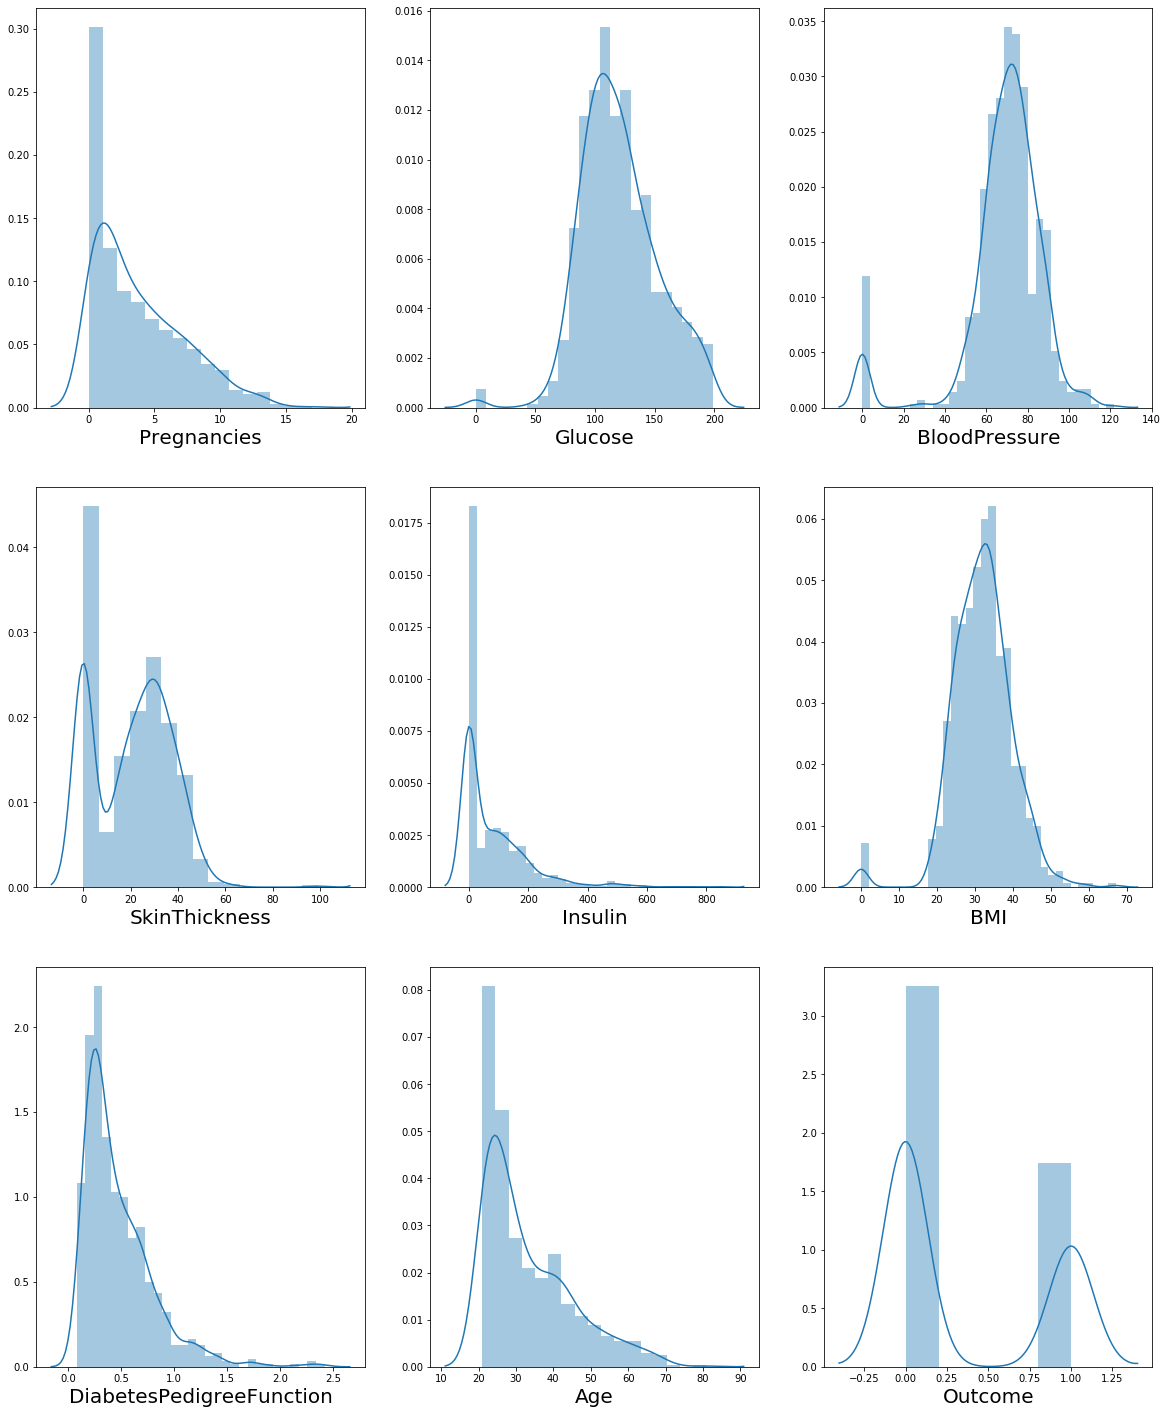

In [110]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [111]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

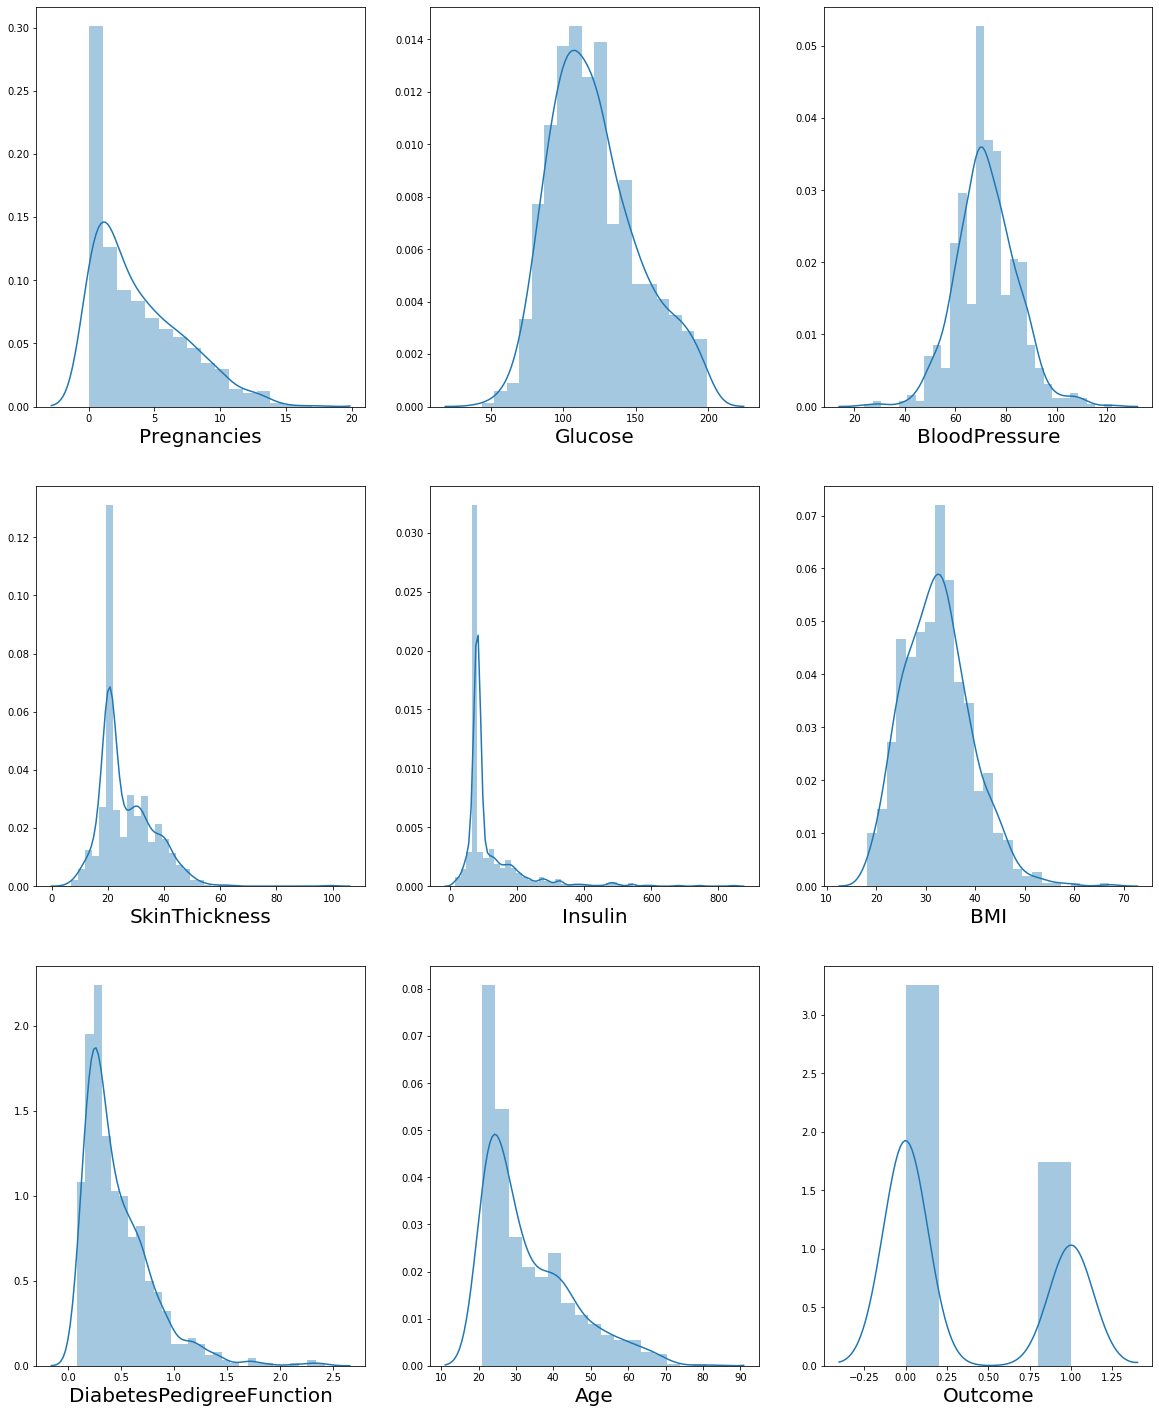

In [112]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

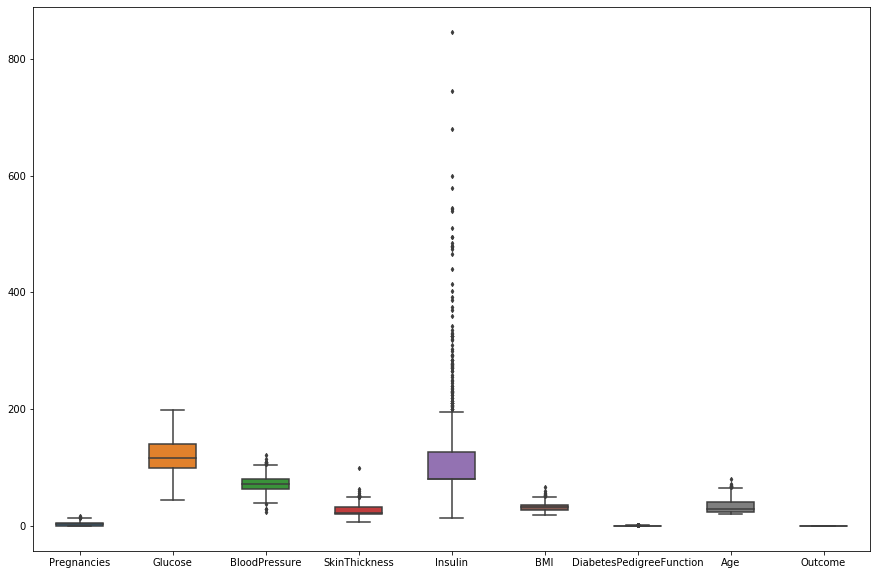

In [113]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [114]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

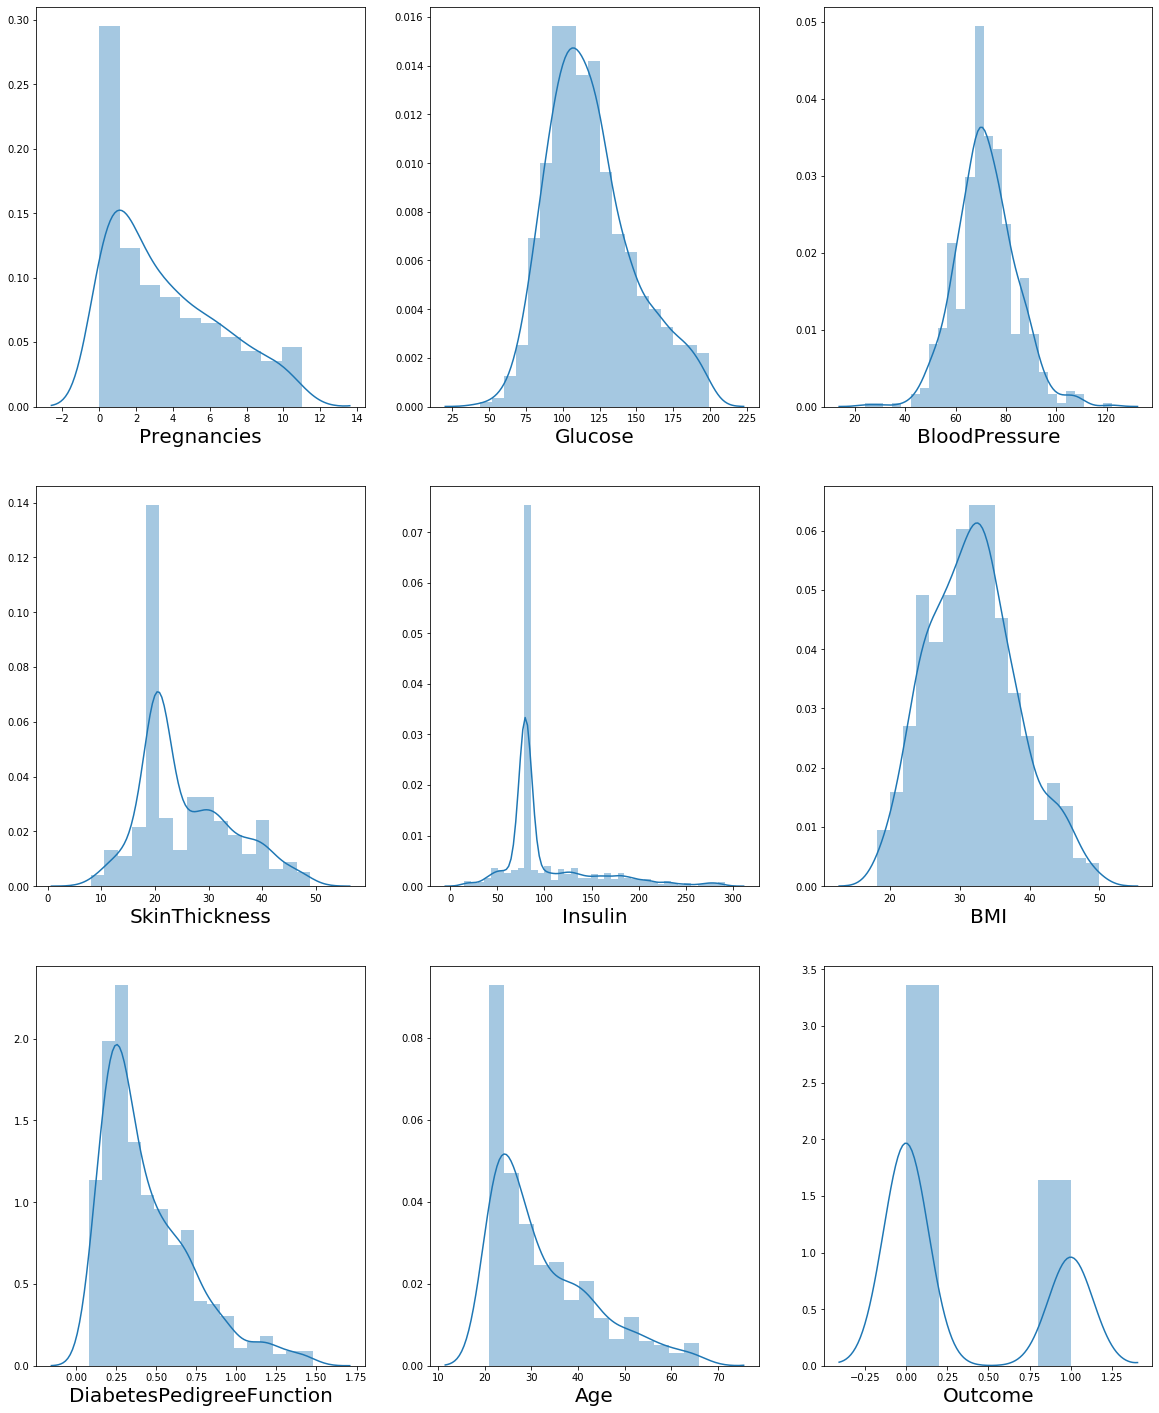

In [115]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [116]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [117]:
X = data.iloc[:,0:8].values
y = data['Outcome']

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [118]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [119]:
data_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [86]:
X = data_scaled.iloc[:,6:]

In [87]:
X

,DiabetesPedigreeFunction,Age
0,0.468492,1.425995
1,-0.365061,-0.190672
2,0.604397,-0.105584
3,-0.920763,-1.041549
4,5.484909,-0.020496
...,...,...
763,-0.908682,2.532136
764,-0.398282,-0.531023
765,-0.685193,-0.275760
766,-0.371101,1.170732


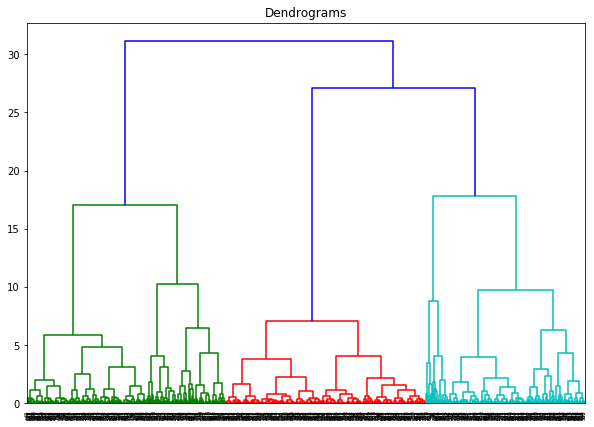

In [88]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

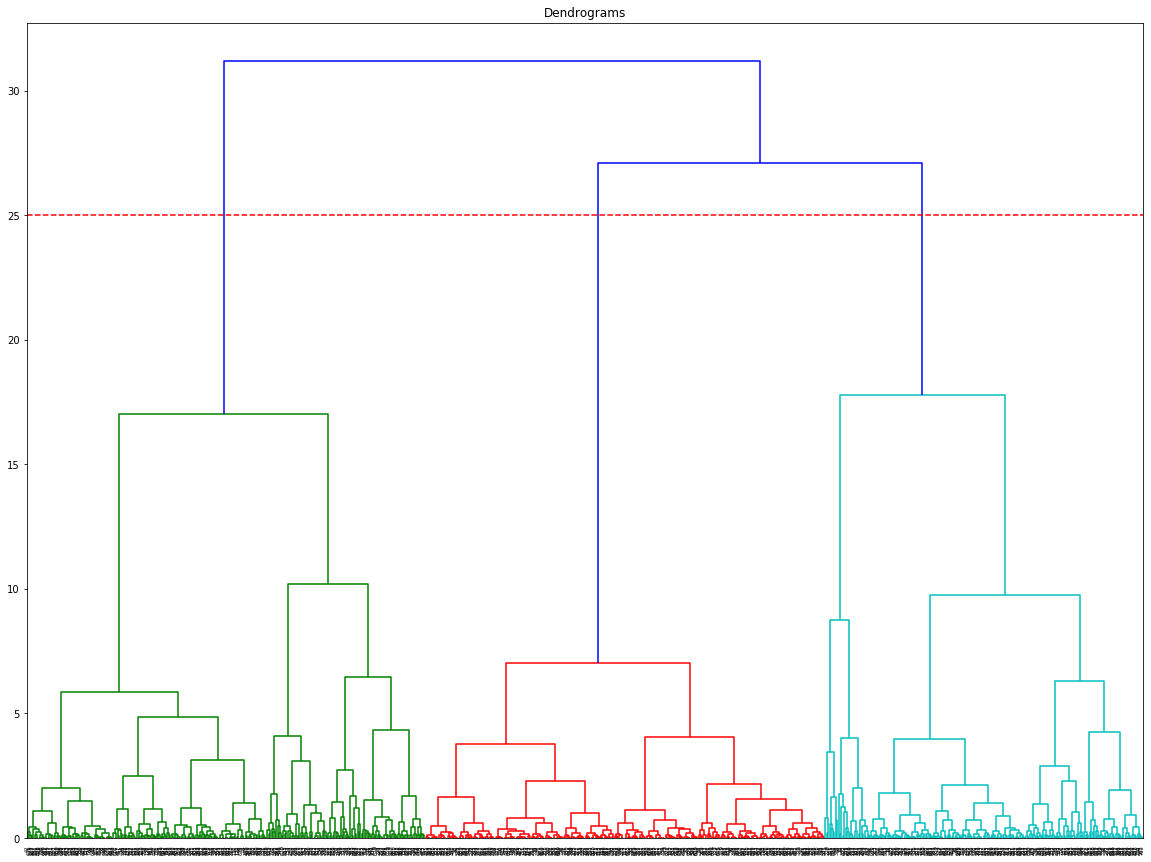

In [89]:
plt.figure(figsize=(20, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=25, color='r', linestyle='--')

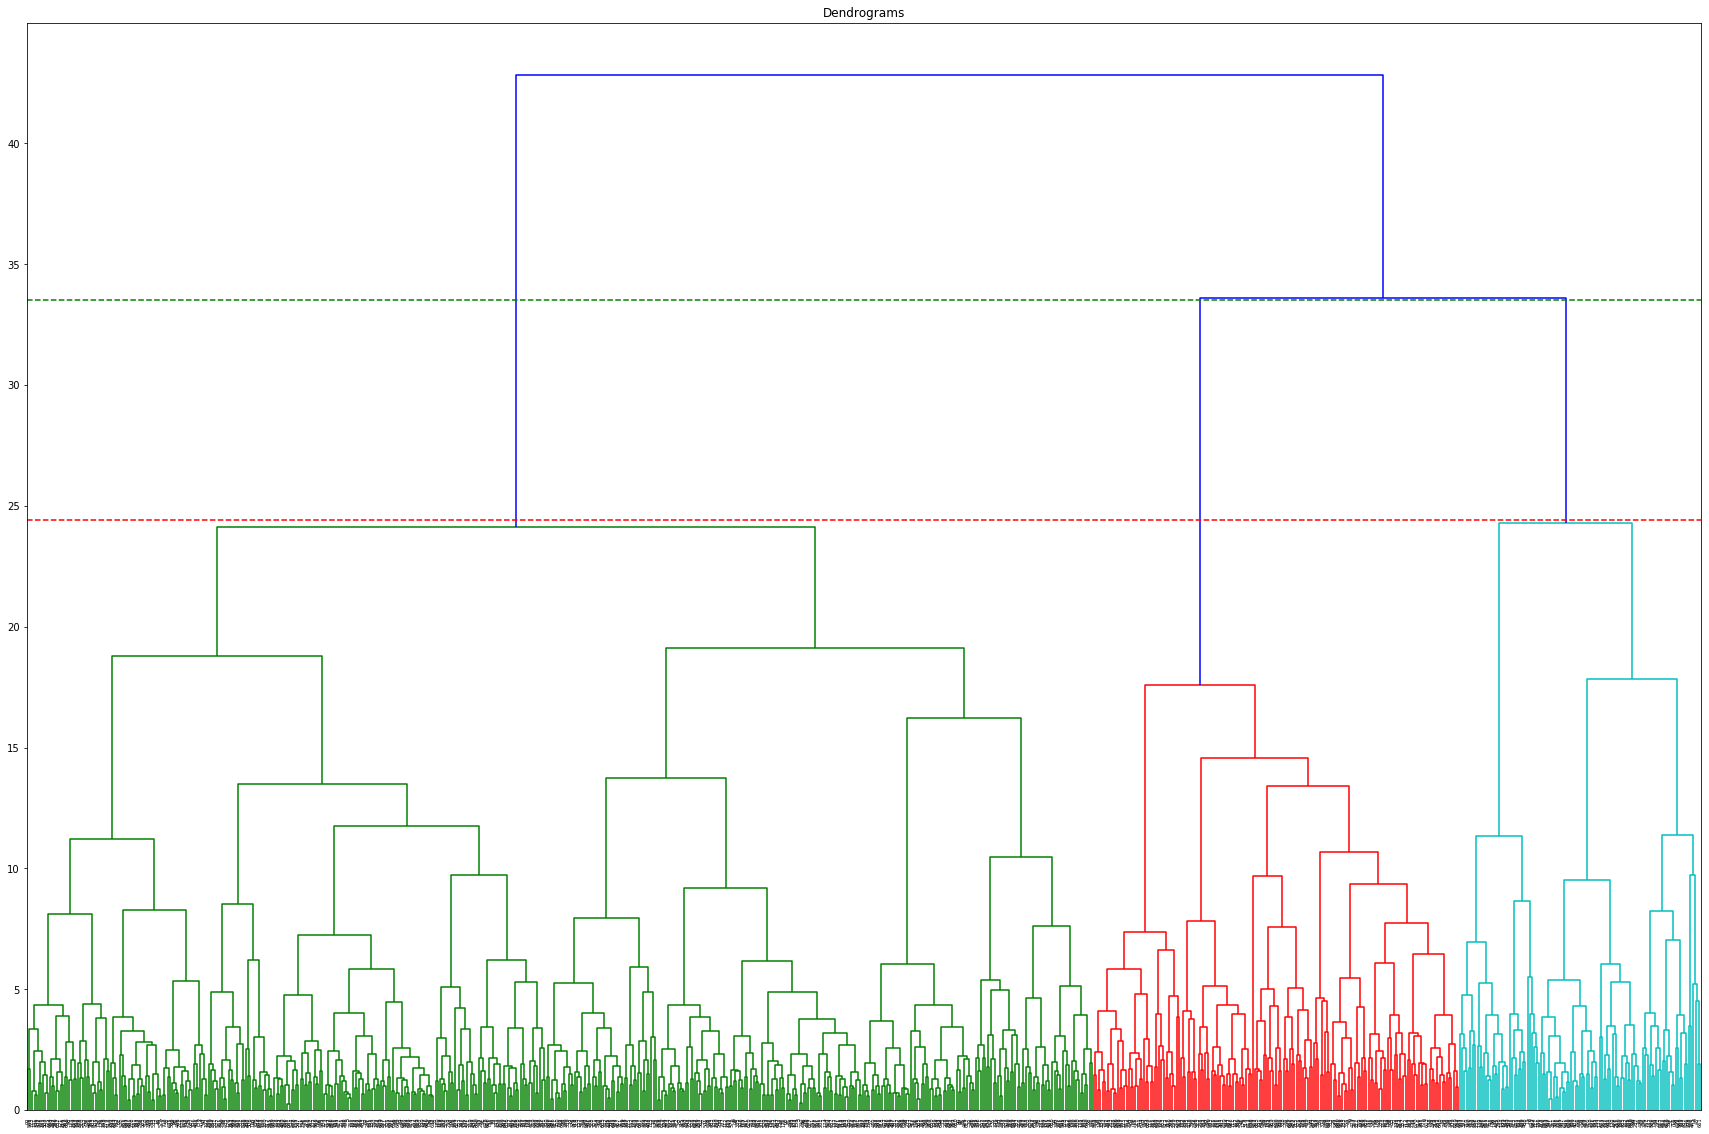

In [72]:
plt.figure(figsize=(30, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=24.4, color='r', linestyle='--')
plt.axhline(y=33.4, color='g', linestyle='--')

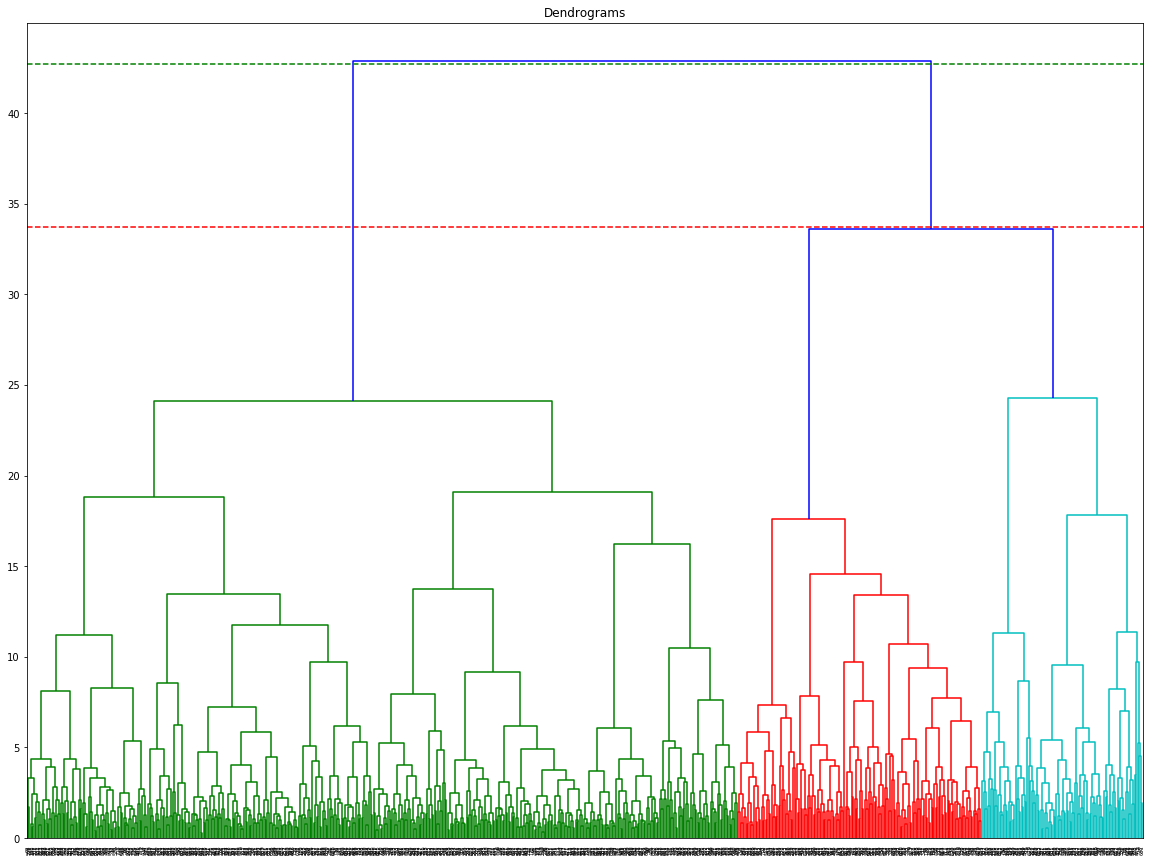

In [68]:
plt.figure(figsize=(20, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=33.7, color='r', linestyle='--')
plt.axhline(y=42.7, color='g', linestyle='--')

In [54]:
dend[:4]

TypeError: unhashable type: 'slice'

In [39]:
from scipy.cluster.hierarchy import *
lm = linkage(data_scaled,"single")
lm[:5]

array([[5.35000000e+02, 6.41000000e+02, 2.67430515e-01, 2.00000000e+00],
       [3.00000000e+00, 2.40000000e+02, 3.11511100e-01, 2.00000000e+00],
       [5.87000000e+02, 6.01000000e+02, 4.06648207e-01, 2.00000000e+00],
       [8.10000000e+01, 4.94000000e+02, 4.17595228e-01, 2.00000000e+00],
       [2.26000000e+02, 7.58000000e+02, 4.28779281e-01, 2.00000000e+00]])

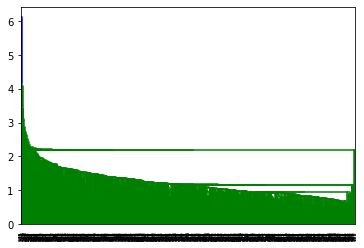

In [40]:
_=dendrogram(lm)

In [102]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
labels = cluster.labels_
labels

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [103]:
plt.scatter(data_scaled[labels==0, 0], data_scaled[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(data_scaled[labels==1, 0], data_scaled[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

TypeError: '(array([ True, False, False, False,  True, False, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True, False, False,  True, False,
       False, False, False,  True, False,  True,  True,  True, False,
        True, False, False, False, False, False, False, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
        True,  True,  True, False, False, False,  True,  True, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False,  True, False, False,  True, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True,  True, False, False, False,  True, False, False, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True,  True, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False, False,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False,  True, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False, False, False,  True, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False]), 0)' is an invalid key

In [97]:
plt.scatter(X[:,:],X[:,:], c=cluster.labels_, cmap='rainbow')

TypeError: '(slice(None, None, None), slice(None, None, None))' is an invalid key

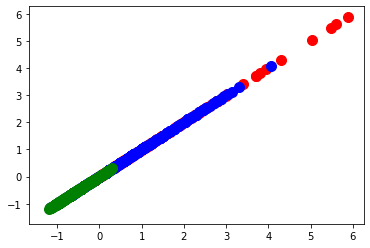

In [101]:
plt.scatter(X[labels == 0], X[labels == 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[labels == 1], X[labels == 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[labels == 2], X[labels == 2], s = 100, c = 'green', label = 'Cluster 3')
plt.show()

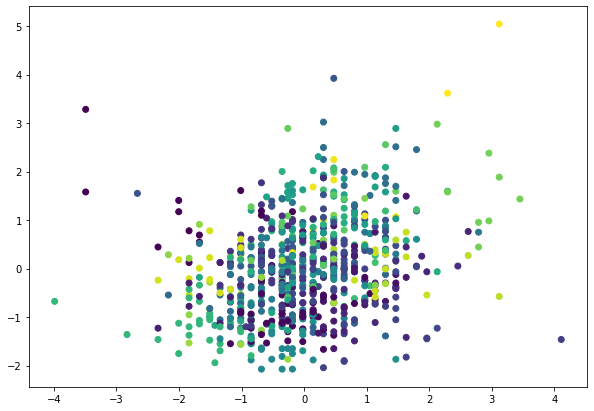

In [46]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['BloodPressure'], data_scaled['BMI'], c=cluster.labels_) 

In [50]:
from scipy.cluster.hierarchy import *

In [ ]:
def dendo(data):
    plt.figure(figsize=(10, 7))  
    plt.title("Dendrograms")  
    dend = shc.dendrogram(linkage(data, method='ward'))
    plt.axhline(y=6, color='r', linestyle='--')